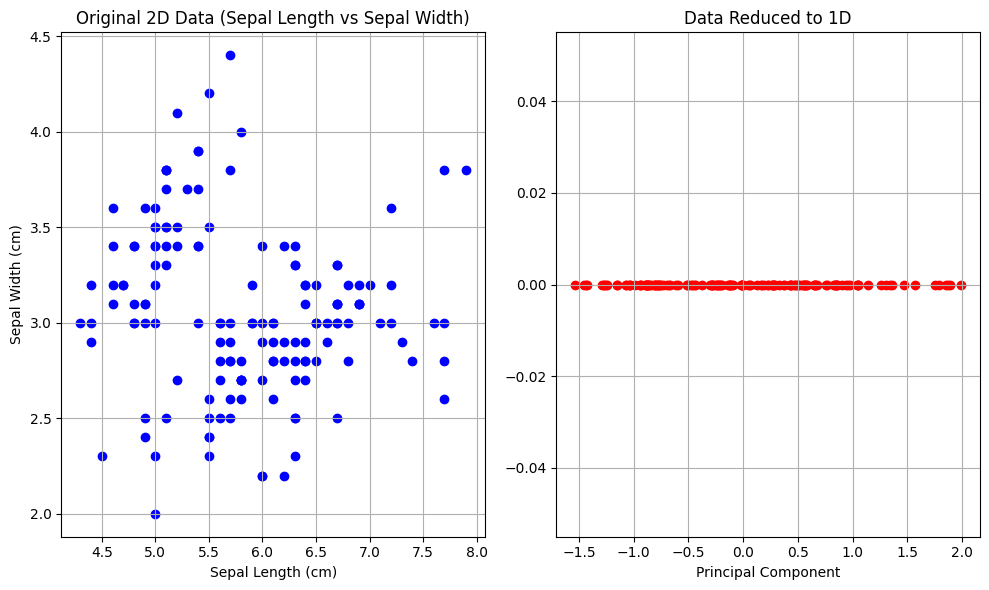

Covariance Matrix (Manual Calculation):
[[ 0.68569351 -0.042434  ]
 [-0.042434    0.18997942]]

Eigenvalues: [0.6892997  0.18637323]
Eigenvectors:
 [[ 0.99640834  0.08467831]
 [-0.08467831  0.99640834]]
1D Reduced Data: [-0.7781478  -0.93509031 -1.15130764 -1.24248065 -0.88625646 -0.51309662
 -1.26788414 -0.8693208  -1.42482665 -0.94355814 -0.49616096 -1.06860247
 -1.03473115 -1.53293532 -0.12300111 -0.25651327 -0.51309662 -0.7781478
 -0.20570628 -0.80355129 -0.47075746 -0.79508346 -1.2848198  -0.76121214
 -1.06860247 -0.83544948 -0.8693208  -0.67850696 -0.67003913 -1.15130764
 -1.04319898 -0.47075746 -0.72931395 -0.43885928 -0.94355814 -0.85238514
 -0.37958446 -0.9858973  -1.43329448 -0.76967997 -0.87778863 -1.27437884
 -1.45023015 -0.87778863 -0.80355129 -1.03473115 -0.80355129 -1.25094848
 -0.59580179 -0.86085297  1.14043154  0.54258654  1.04925854 -0.27797049
  0.6760987  -0.12102798  0.43447787 -0.88428333  0.7672717  -0.61076432
 -0.75077117  0.06131803  0.22870151  0.26906753 -0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:, :2]

mean = np.mean(data, axis=0)
centered_data = data - mean

cov_X_X = np.sum(centered_data[:, 0] * centered_data[:, 0]) / (data.shape[0] - 1)
cov_Y_Y = np.sum(centered_data[:, 1] * centered_data[:, 1]) / (data.shape[0] - 1)
cov_X_Y = np.sum(centered_data[:, 0] * centered_data[:, 1]) / (data.shape[0] - 1)
cov_Y_X = cov_X_Y

cov_matrix_manual = np.array([[cov_X_X, cov_X_Y], [cov_Y_X, cov_Y_Y]])

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_manual)

sorted_indices = np.argsort(-eigenvalues)
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

first_principal_component = eigenvectors_sorted[:, 0]
reduced_data = np.dot(centered_data, first_principal_component)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Original Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Original 2D Data (Sepal Length vs Sepal Width)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(reduced_data, np.zeros_like(reduced_data), color='red', label='1D Reduced Data')
plt.xlabel('Principal Component')
plt.title('Data Reduced to 1D')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Covariance Matrix (Manual Calculation):")
print(cov_matrix_manual)
print("\nEigenvalues:", eigenvalues_sorted)
print("Eigenvectors:\n", eigenvectors_sorted)
print("1D Reduced Data:", reduced_data)
